In [2]:
%matplotlib inline
import pandas as pd

# Cosine similarity



In [9]:
df_m = pd.read_csv("medium_emotions.csv")
df_m.head()

,author,content,filename,followers,description,claps,people_clapped,min_read,high_text,author_date,...,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,Josh Spector,You re busy so I ll keep this quick Following ...,3.The Two Minutes It Takes To Read This Will I...,27000,Writer. Strategist. For The Interested newslet...,25191,17953,2,Delete the word “that.”,Apr 2017,...,0.203704,0.277778,0.092593,0.148148,0.037037,0.185185,0.185185,0.166667,0.296296,0.185185
1,Trent Lapinski,rump Is What Happens When You Nominate A Cheat...,"8.Dear Democrats, Read This If You Do Not Unde...",13400,Tech Entrepreneur. Journalist. Technologist. C...,10885,9981,5,"This is the problem with America today, the te...",NaN,...,0.051502,0.253219,0.055794,0.021459,0.077253,0.111588,0.081545,0.051502,0.133047,0.060086
2,Shem Magnezi,That s right I said it Fuck your startup scene...,2.Fuck You Startup World,6200,Doing what I love,22661,17316,5,You should celebrate any day that you don’t ha...,NaN,...,0.064677,0.208955,0.079602,0.054726,0.014925,0.079602,0.094527,0.039801,0.149254,0.064677
3,Tobias Stone,It seems we re entering another of those stupi...,1.History tells us what may happen next with B...,27000,"Writing about politics, history, and society. ...",18983,17092,7,We need to find a way to bridge from our close...,Aug 2017,...,0.123746,0.140468,0.030100,0.068562,0.045151,0.073579,0.081940,0.096990,0.239130,0.133779
4,Max Braun,When I couldn t buy a smart mirror and made on...,10.My Bathroom Mirror Is Smarter Than Yours,7400,Inevitable technology. Lately robots at X.,10353,9506,3,Maybe I’ll post a more detailed making-of with...,NaN,...,0.008621,0.112069,0.025862,0.025862,0.000000,0.077586,0.068966,0.017241,0.068966,0.025862


Let's compare them based on the number of animals they have. So those animal counts will be our **features.**

In [11]:
features_df_m = df_m[['anger','joy']]
features_df_m

,anger,joy
0,0.203704,0.092593
1,0.051502,0.055794
2,0.064677,0.079602
3,0.123746,0.030100
4,0.008621,0.025862
5,0.111111,0.092593
6,0.061962,0.044750
7,0.032487,0.038579
8,0.081579,0.078947
9,0.008929,0.111607


And we'll save everyone's name into a list called **names**.

In [13]:
m_names = df_m.author
m_names

0                Josh Spector
1              Trent Lapinski
2                Shem Magnezi
3                Tobias Stone
4                   Max Braun
5    Hillary Clinton [parody]
6               Jose Aguinaga
7               Jose Aguinaga
8               David Hopkins
9       Tristan de Montebello
Name: author, dtype: object

Scikit-learn has a lot of [pairwise metrics](http://scikit-learn.org/stable/modules/metrics.html#metrics) you can use to see how related things are. Y'know, like how we spend time clustering things, this is kind of the step in-between that you don't get to see.

You can use other metrics, but cosine similarity is a pretty good/safe/reasonably understandable one.

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Use cosine_similarity to create a matrix of... similarities
# call it similarity

In [24]:
similarity_m = cosine_similarity(features_df_m)
similarity_m

array([[ 1.        ,  0.9215473 ,  0.89522865,  0.98237659,  0.6804511 ,
         0.96427309,  0.98029291,  0.9029221 ,  0.94195873,  0.48508247],
       [ 0.9215473 ,  1.        ,  0.99800967,  0.83273476,  0.91158676,
         0.99147891,  0.98008807,  0.99896384,  0.99841159,  0.7865529 ],
       [ 0.89522865,  0.99800967,  1.        ,  0.79616219,  0.93569729,
         0.98129075,  0.96561576,  0.99984554,  0.99287152,  0.82392904],
       [ 0.98237659,  0.83273476,  0.79616219,  1.        ,  0.53149107,
         0.89776432,  0.92609236,  0.80667381,  0.86260637,  0.31308471],
       [ 0.6804511 ,  0.91158676,  0.93569729,  0.53149107,  1.        ,
         0.85026515,  0.81180439,  0.92935209,  0.88697664,  0.97087966],
       [ 0.96427309,  0.99147891,  0.98129075,  0.89776432,  0.85026515,
         1.        ,  0.99760295,  0.984523  ,  0.99724341,  0.69940757],
       [ 0.98029291,  0.98008807,  0.96561576,  0.92609236,  0.81180439,
         0.99760295,  1.        ,  0.97003575

In [25]:
pd.DataFrame(similarity_m, columns=m_names, index=m_names)

author,Josh Spector,Trent Lapinski,Shem Magnezi,Tobias Stone,Max Braun,Hillary Clinton [parody],Jose Aguinaga,Jose Aguinaga,David Hopkins,Tristan de Montebello
author,,,,,,,,,,
Josh Spector,1.000000,0.921547,0.895229,0.982377,0.680451,0.964273,0.980293,0.902922,0.941959,0.485082
Trent Lapinski,0.921547,1.000000,0.998010,0.832735,0.911587,0.991479,0.980088,0.998964,0.998412,0.786553
Shem Magnezi,0.895229,0.998010,1.000000,0.796162,0.935697,0.981291,0.965616,0.999846,0.992872,0.823929
Tobias Stone,0.982377,0.832735,0.796162,1.000000,0.531491,0.897764,0.926092,0.806674,0.862606,0.313085
Max Braun,0.680451,0.911587,0.935697,0.531491,1.000000,0.850265,0.811804,0.929352,0.886977,0.970880
Hillary Clinton [parody],0.964273,0.991479,0.981291,0.897764,0.850265,1.000000,0.997603,0.984523,0.997243,0.699408
Jose Aguinaga,0.980293,0.980088,0.965616,0.926092,0.811804,0.997603,1.000000,0.970036,0.989719,0.648274
Jose Aguinaga,0.902922,0.998964,0.999846,0.806674,0.929352,0.984523,0.970036,1.000000,0.994813,0.813842
David Hopkins,0.941959,0.998412,0.992872,0.862606,0.886977,0.997243,0.989719,0.994813,1.000000,0.750512


In [27]:
pd.DataFrame(similarity_m, columns=m_names, index=m_names)

author,Josh Spector,Trent Lapinski,Shem Magnezi,Tobias Stone,Max Braun,Hillary Clinton [parody],Jose Aguinaga,Jose Aguinaga,David Hopkins,Tristan de Montebello
author,,,,,,,,,,
Josh Spector,1.000000,0.921547,0.895229,0.982377,0.680451,0.964273,0.980293,0.902922,0.941959,0.485082
Trent Lapinski,0.921547,1.000000,0.998010,0.832735,0.911587,0.991479,0.980088,0.998964,0.998412,0.786553
Shem Magnezi,0.895229,0.998010,1.000000,0.796162,0.935697,0.981291,0.965616,0.999846,0.992872,0.823929
Tobias Stone,0.982377,0.832735,0.796162,1.000000,0.531491,0.897764,0.926092,0.806674,0.862606,0.313085
Max Braun,0.680451,0.911587,0.935697,0.531491,1.000000,0.850265,0.811804,0.929352,0.886977,0.970880
Hillary Clinton [parody],0.964273,0.991479,0.981291,0.897764,0.850265,1.000000,0.997603,0.984523,0.997243,0.699408
Jose Aguinaga,0.980293,0.980088,0.965616,0.926092,0.811804,0.997603,1.000000,0.970036,0.989719,0.648274
Jose Aguinaga,0.902922,0.998964,0.999846,0.806674,0.929352,0.984523,0.970036,1.000000,0.994813,0.813842
David Hopkins,0.941959,0.998412,0.992872,0.862606,0.886977,0.997243,0.989719,0.994813,1.000000,0.750512


In that big matrix,**every column is a person and every row is a person**, and the intersection is how similar they are. If we want to see it a little more nicely...

In [29]:
similarity_df_m = pd.DataFrame(similarity_m, columns=m_names, index=m_names)

Everyone is 100% similar to themselves - `1.0` - but for everyone else it gets closer and closer to `0` if they're less related.

So, now that we've made a nice dataframe with nice rows and columns, who is Josh Spector most similar to?

In [32]:
similarity_df_m['Josh Spector'].sort_values(ascending=False)

author
Josh Spector                1.000000
Tobias Stone                0.982377
Jose Aguinaga               0.980293
Hillary Clinton [parody]    0.964273
David Hopkins               0.941959
Trent Lapinski              0.921547
Jose Aguinaga               0.902922
Shem Magnezi                0.895229
Max Braun                   0.680451
Tristan de Montebello       0.485082
Name: Josh Spector, dtype: float64

Let's visualize this while we're at it! We're going to use seaborn because it's so easy.

In [39]:
%matplotlib inline
import seaborn as sns

### How similar are they? We could cluster, but instead...

In [38]:
# Use cosine similarity to make a similarity matrix, 
# then use that to make a dataframe with sensible indexes and columns
# cmap makes the colors better. The default one is pretty ugly.
#ax = sns.heatmap(similarity_df_m, cmap="YlGnBu")

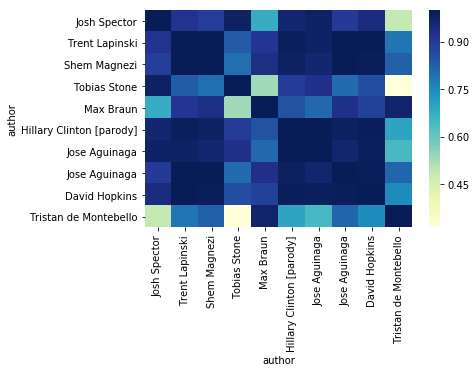

In [34]:
sns.heatmap(similarity_df_m, cmap="YlGnBu")

## Let's try it without stopwords to compare

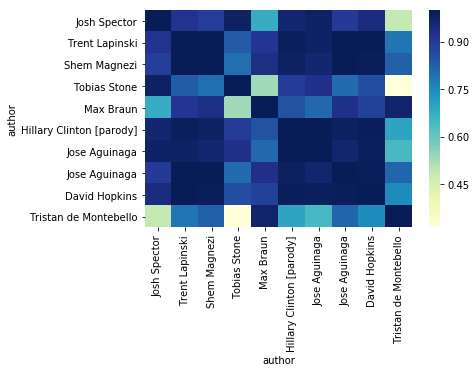

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
matrix = vec.fit_transform(df_m.content)
similarity = cosine_similarity(matrix)
similarity_df = pd.DataFrame(similarity, index=df_m.filename, columns=df_m.filename)
sns.heatmap(similarity_df_m, cmap="YlGnBu")

Hmm, interesting: **why does it change so much?**

In [37]:
similarity_df_m['Max Braun'].sort_values(ascending=False)

author
Max Braun                   1.000000
Tristan de Montebello       0.970880
Shem Magnezi                0.935697
Jose Aguinaga               0.929352
Trent Lapinski              0.911587
David Hopkins               0.886977
Hillary Clinton [parody]    0.850265
Jose Aguinaga               0.811804
Josh Spector                0.680451
Tobias Stone                0.531491
Name: Max Braun, dtype: float64